In [651]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


train_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Data_Train.xlsx")
#test_df = pd.read_excel("C:\\Users\\shind\\JupiterWorking\\iNuron\\EDA\\Data Travel\\Test_set.xlsx")

#df = pd.concat([train_df,test_df])

df = train_df



In [652]:
# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)

In [653]:
# Size of the Data
df.shape

(10682, 11)

In [654]:
# View of the Data
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [655]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10681 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10681 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [656]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [657]:
routeMissingRow = df[df['Route'].isnull() == True].index
routeMissingRow

Int64Index([9038], dtype='int64')

In [658]:
df.drop(routeMissingRow,inplace=True)


In [659]:
# how mathematically look like?

df.describe()

,Price
count,10681.000000
mean,9086.443123
std,4611.075357
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [660]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<AxesSubplot:>

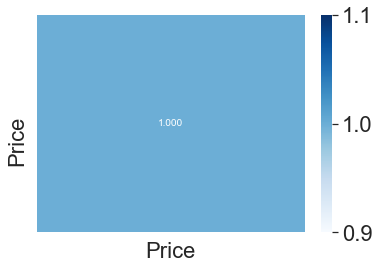

In [661]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [662]:
#counts/Unique

df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [663]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [664]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [665]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)


In [666]:
df.columns

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → VTZ → 

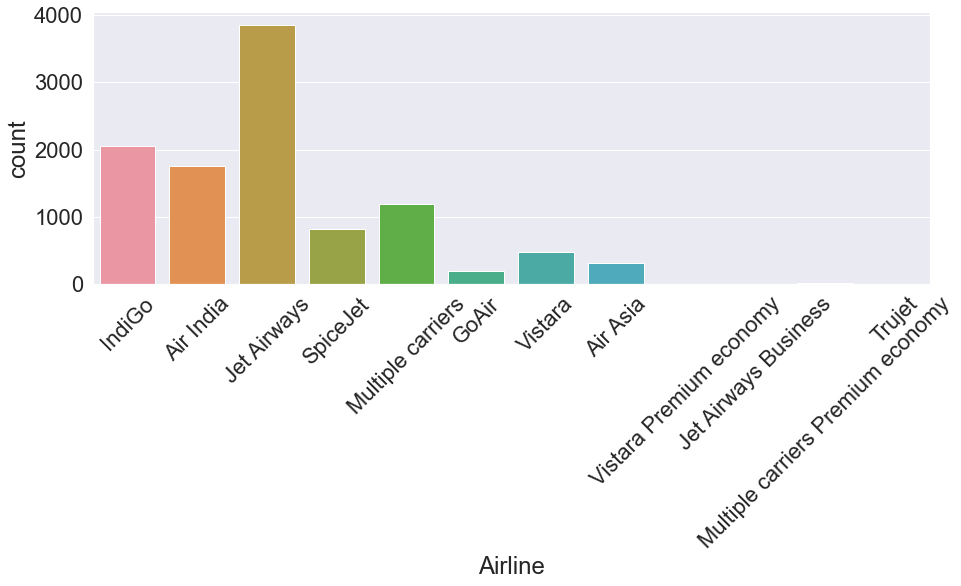

In [667]:
# Graph-Based Analysis
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


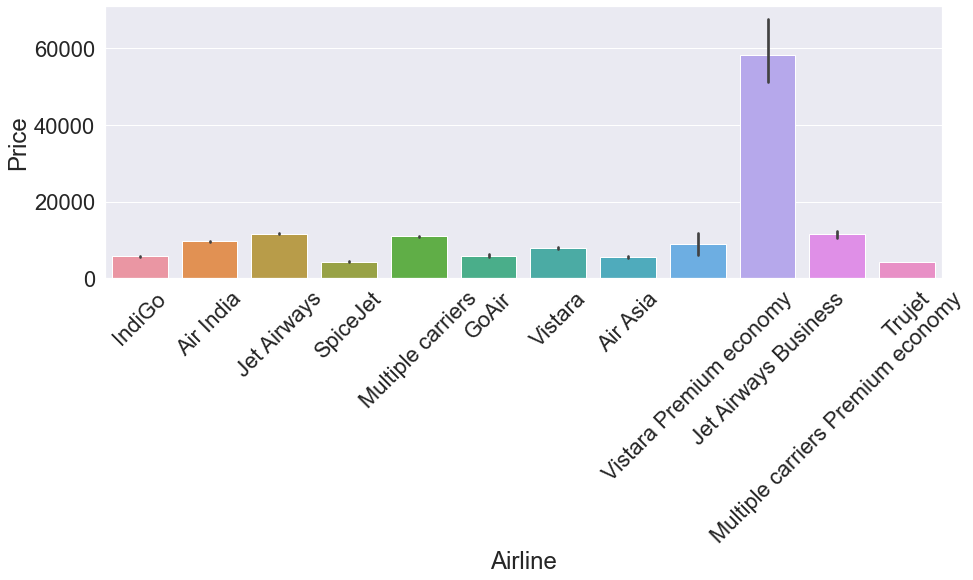

In [668]:
plt.figure(figsize=(15,5))

sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


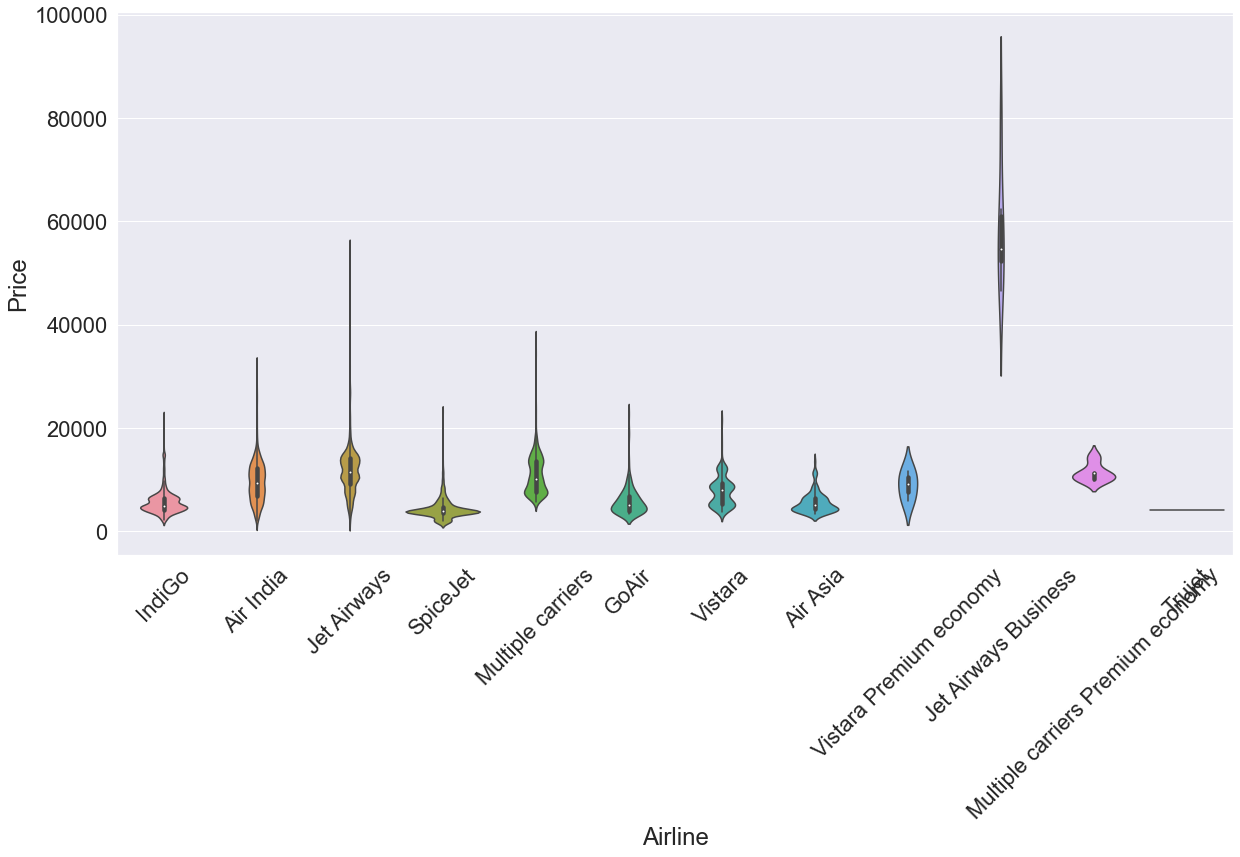

In [669]:

plt.figure(figsize=(20,10))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1440x360 with 0 Axes>

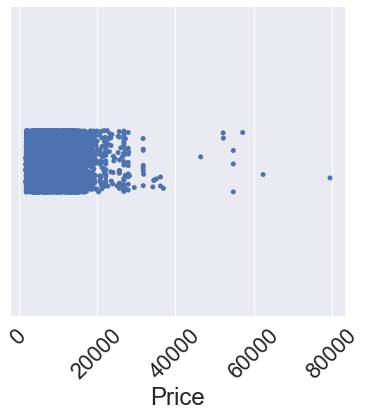

In [670]:
plt.figure(figsize=(20,5))
sns.catplot(data = df, x='Price')
plt.xticks(rotation=45) 
plt.show() 


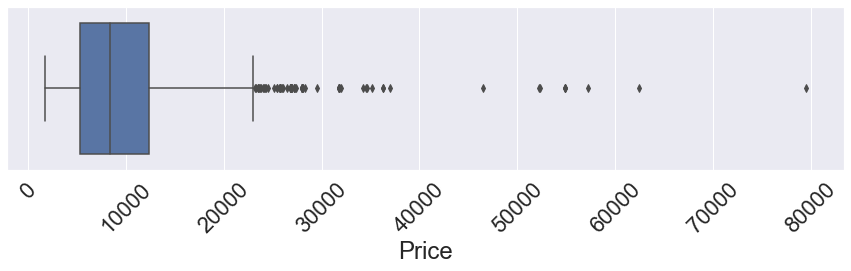

In [671]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



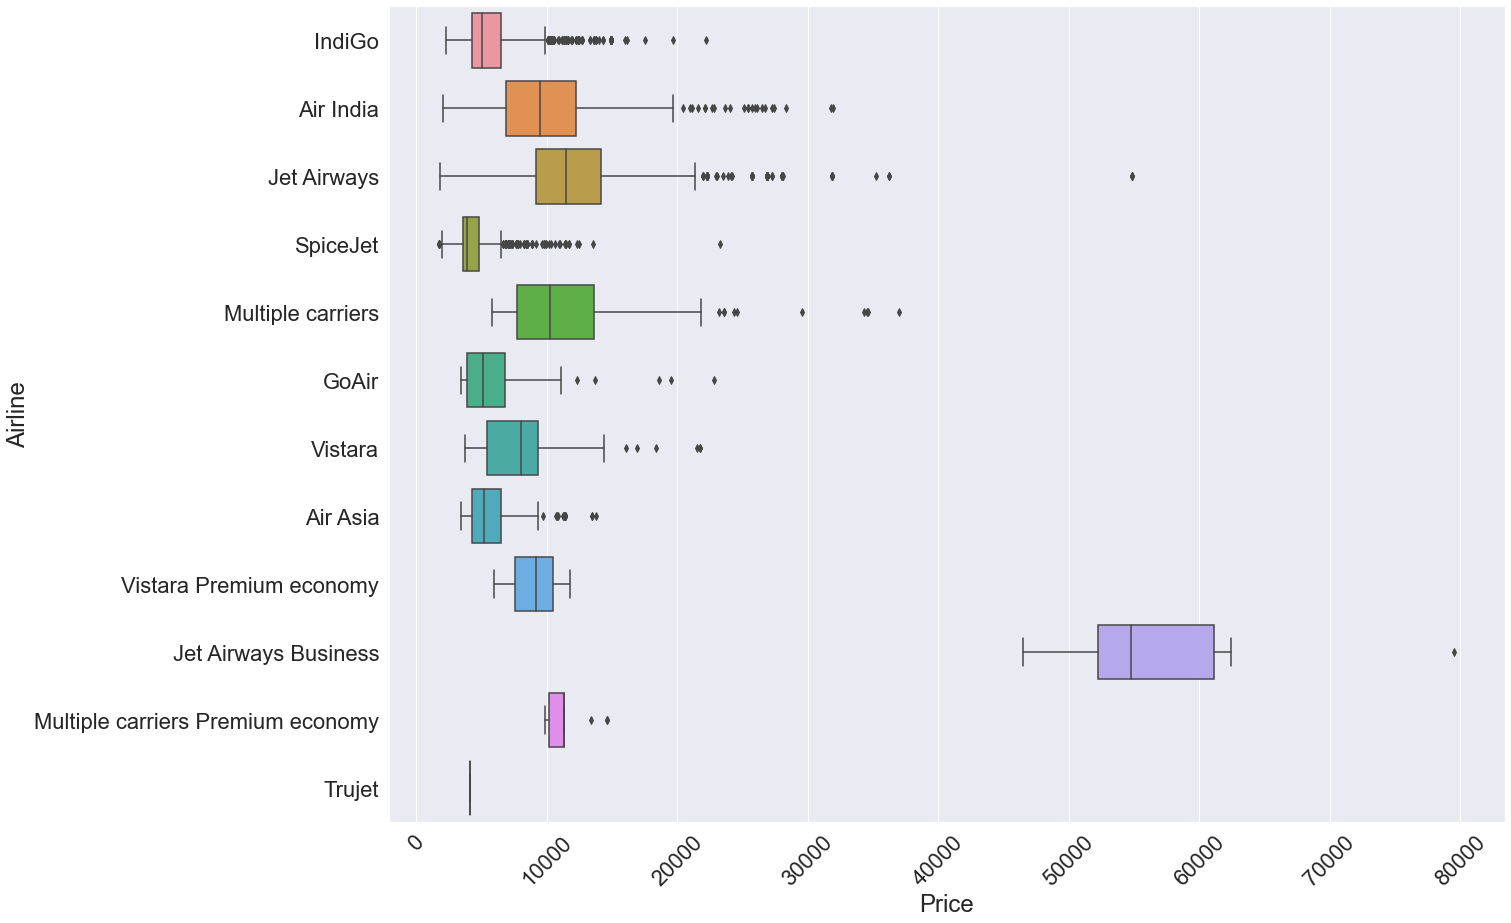

In [672]:
# Outlier Detection

plt.figure(figsize=(20,15))
sns.boxplot(y=df['Airline'],x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<AxesSubplot:xlabel='Price', ylabel='Density'>

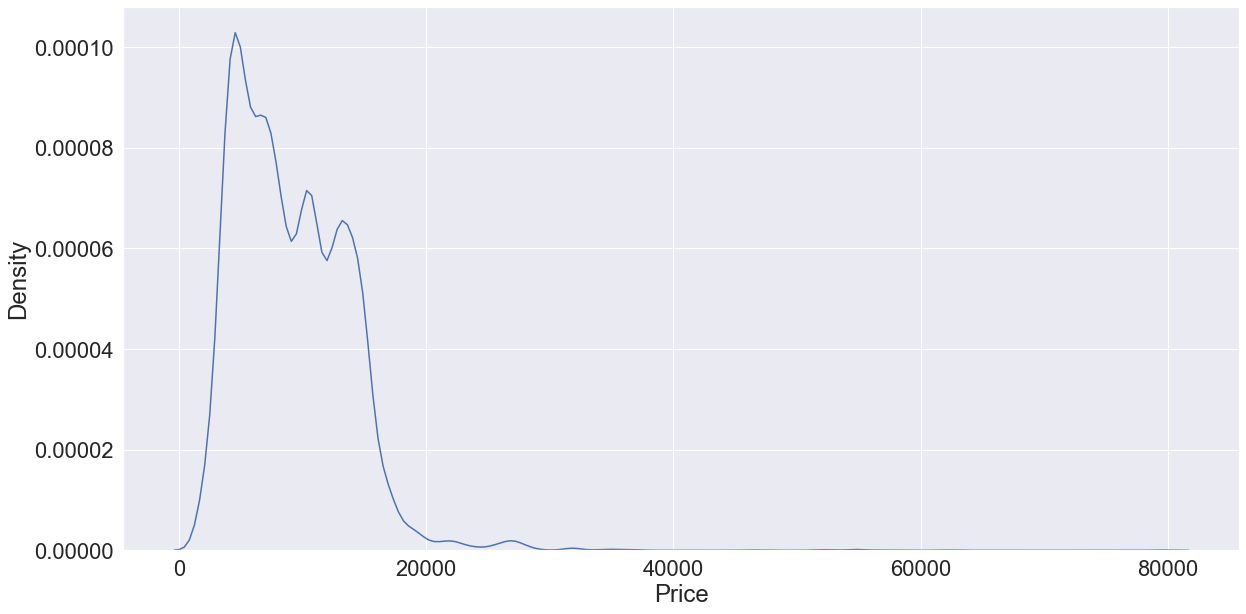

In [673]:

plt.figure(figsize=(20,10))
sns.kdeplot(x=df['Price'])


<AxesSubplot:xlabel='Price', ylabel='Count'>

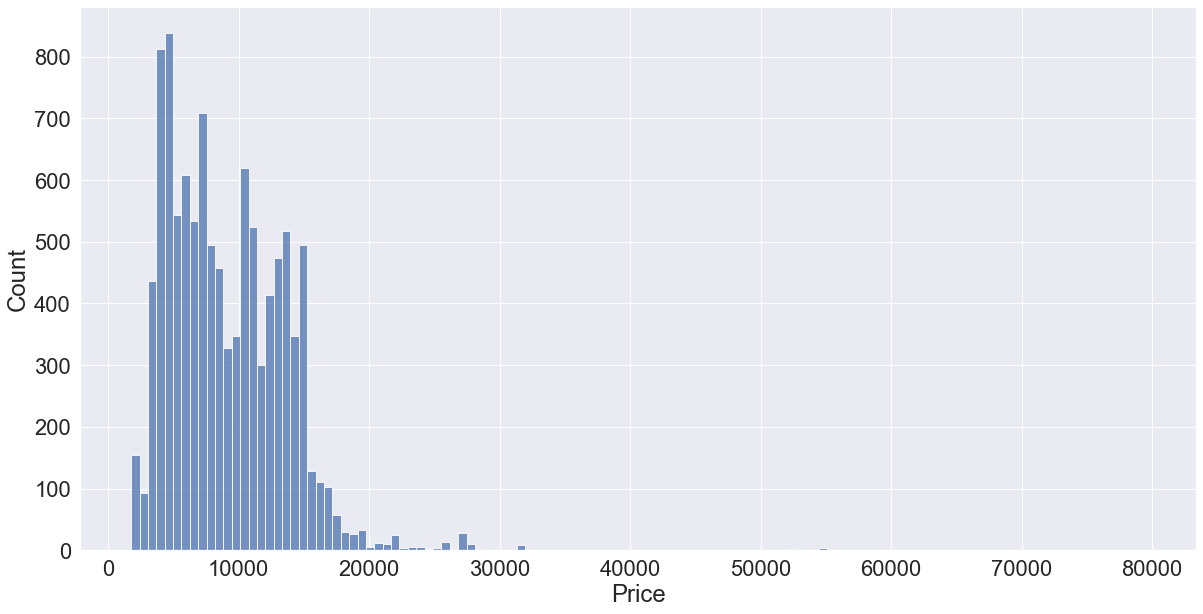

In [674]:
df['Airline']
plt.figure(figsize=(20,10))
sns.histplot(x=df['Price'])

In [675]:
df[df['Airline']=='Air India']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,1/06/2019,Delhi,Cochin,DEL → BLR → COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24/06/2019,Chennai,Kolkata,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,3/03/2019,Delhi,Cochin,DEL → AMD → BOM → COK,16:40,19:15 04 Mar,26h 35m,2 stops,No info,14011
18,Air India,12/06/2019,Delhi,Cochin,DEL → CCU → BOM → COK,20:15,19:15 13 Jun,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12/05/2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10670,Air India,6/06/2019,Mumbai,Hyderabad,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10674,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145


In [676]:
for i in list(enumerate(df['Airline'].unique())):
    print([i[1]])

['IndiGo']
['Air India']
['Jet Airways']
['SpiceJet']
['Multiple carriers']
['GoAir']
['Vistara']
['Air Asia']
['Vistara Premium economy']
['Jet Airways Business']
['Multiple carriers Premium economy']
['Trujet']


In [677]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [678]:
list(enumerate(df['Airline'].unique()))

[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Vistara Premium economy'),
 (9, 'Jet Airways Business'),
 (10, 'Multiple carriers Premium economy'),
 (11, 'Trujet')]

In [679]:
for i in list(enumerate(df['Airline'].unique())):
    print(df['Airline'].unique()[i[0]])
    


IndiGo
Air India
Jet Airways
SpiceJet
Multiple carriers
GoAir
Vistara
Air Asia
Vistara Premium economy
Jet Airways Business
Multiple carriers Premium economy
Trujet


In [680]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[1])


IndiGo
Air India
Jet Airways
SpiceJet
Multiple carriers
GoAir
Vistara
Air Asia
Vistara Premium economy
Jet Airways Business
Multiple carriers Premium economy
Trujet


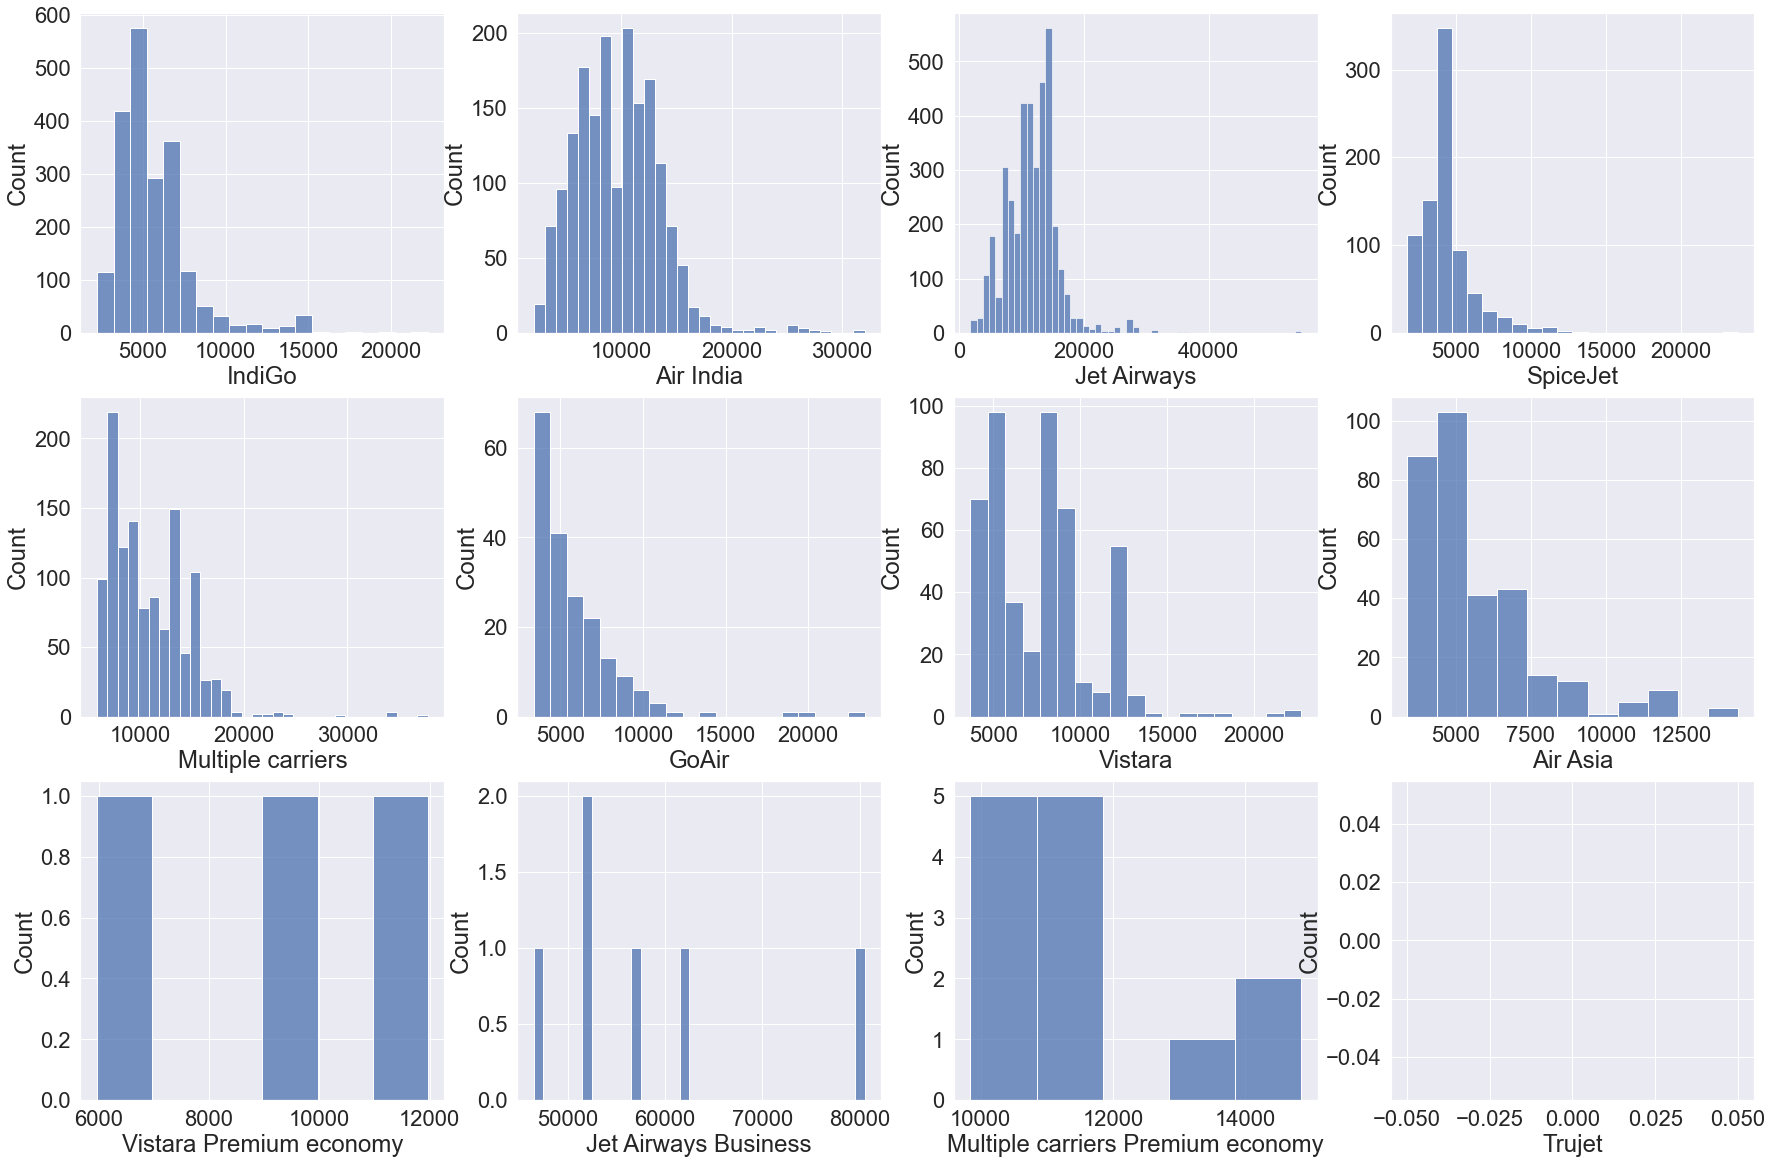

In [681]:
plt.figure(figsize=(30,20))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = df[df['Airline']==i[1]]
    sns.histplot(x=indi['Price'],binwidth=1000)
    plt.xlabel(i[1]) 


In [682]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

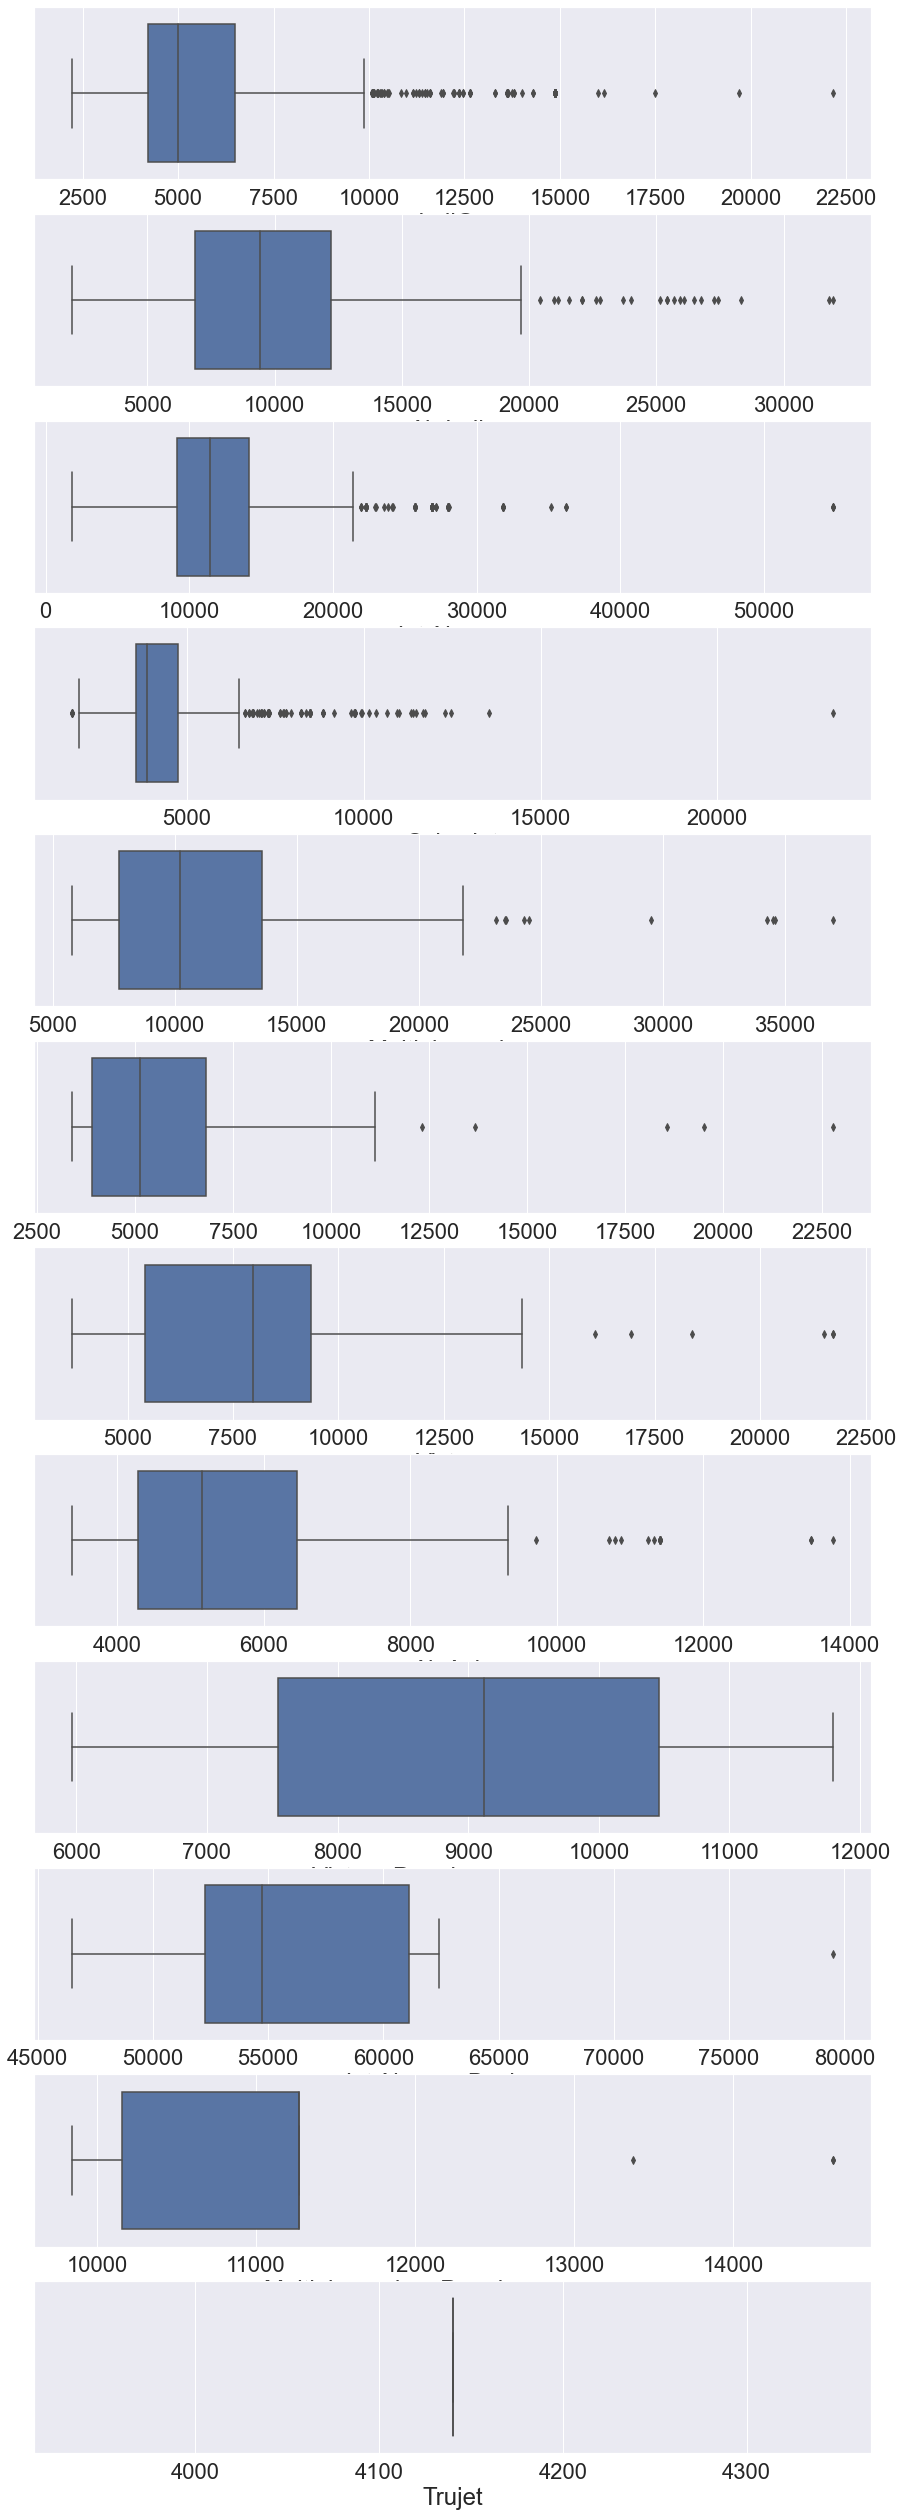

In [683]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



q1:  4226.0
q3:  6494.0
IQR 2268.0
lowerLimit:  824.0
upperLimit:  9896.0


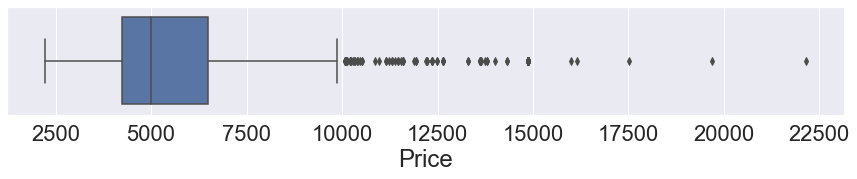

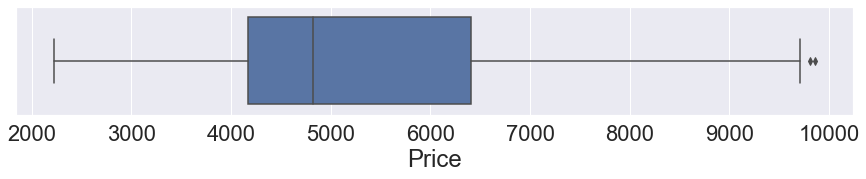

In [684]:
# Remove Outlier

airDataSet = df[df['Airline'] == 'IndiGo']

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(0.75)
print('q1: ',q1)
print('q3: ',q3)
IQR = q3-q1
print('IQR',IQR)

lowerLimit = q1-IQR*1.5
upperLimit = q3+IQR*1.5
print('lowerLimit: ',lowerLimit)
print('upperLimit: ',upperLimit)

lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index

airDataSet.drop(upperLimitIndex,axis=0,inplace=True)

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])
IndiGoDataSet = airDataSet


6961.0
12214.0
5253.0
-918.5
20093.5


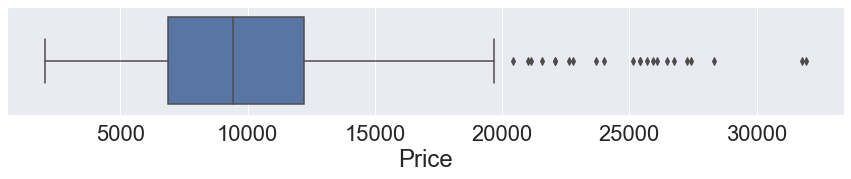

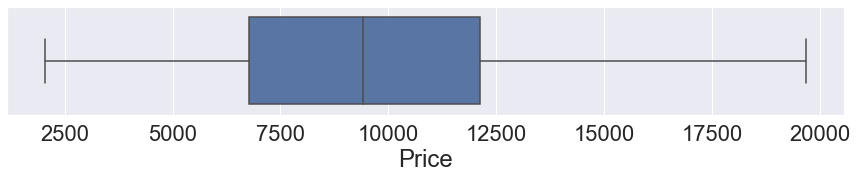

In [685]:
airDataSet = df[df['Airline']=='Air India']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.27)
q3 = airDataSet['Price'].quantile(0.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

AirIndiaDataSet = airDataSet

9564.0
14151.0
4587.0
2683.5
21031.5


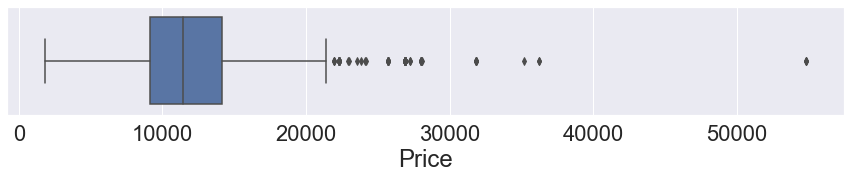

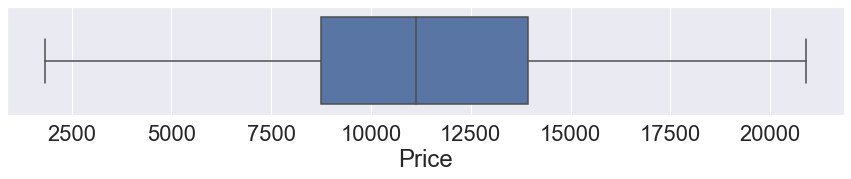

In [686]:
airDataSet = df[df['Airline']=='Jet Airways']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.27)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

JetAirwaysDataSet = airDataSet

2211.4
3925.0
1713.6
-358.99999999999955
6495.4


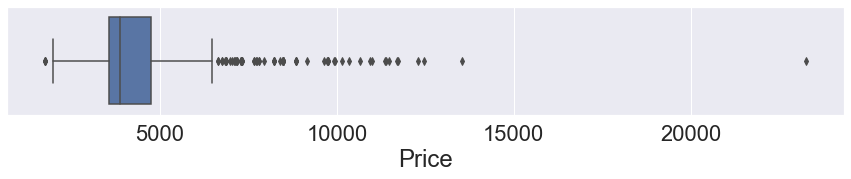

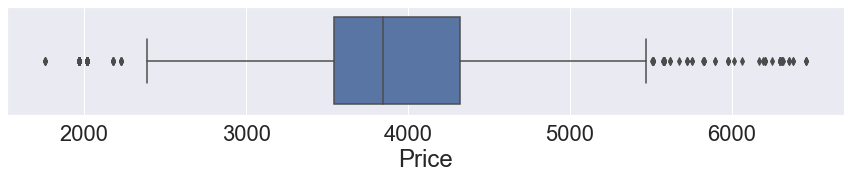

In [687]:
airDataSet = df[df['Airline']=='SpiceJet']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.10)
q3 = airDataSet['Price'].quantile(.60)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)

airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

SpiceJetDataSet = airDataSet



7485.0
13727.0
6242.0
-1878.0
23090.0


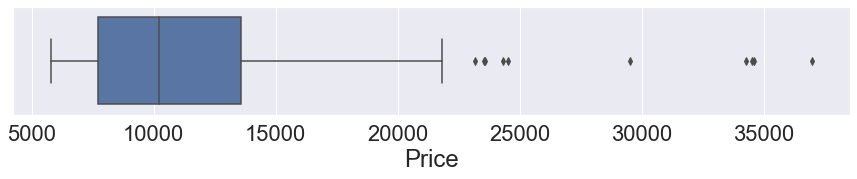

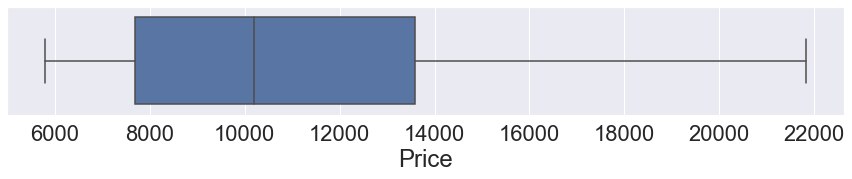

In [688]:
airDataSet = df[df['Airline']=='Multiple carriers']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.80)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

MultiplecarriersDataSet = airDataSet

3898.0
6811.25
2913.25
-471.875
11181.125


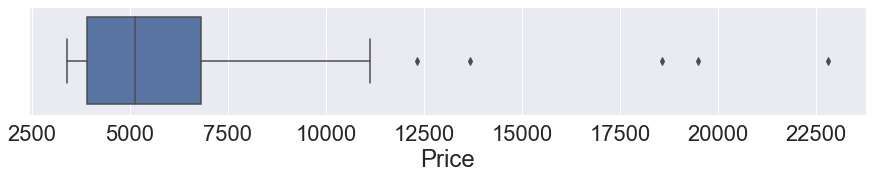

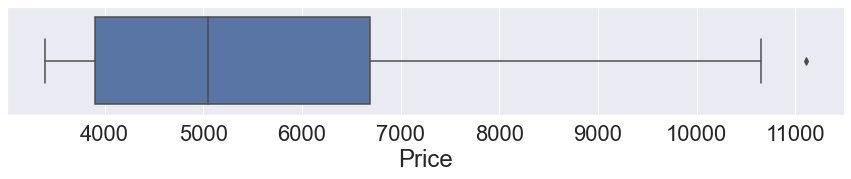

In [689]:
airDataSet = df[df['Airline']=='GoAir']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

GoAirDataSet = airDataSet

4878.0
9345.0
4467.0
-1822.5
16045.5


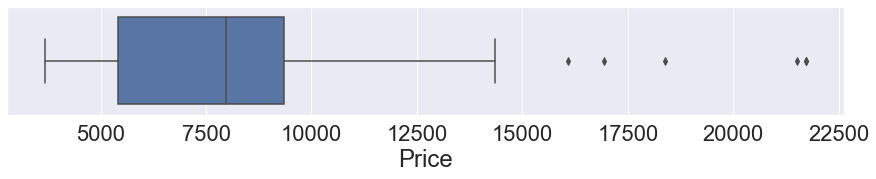

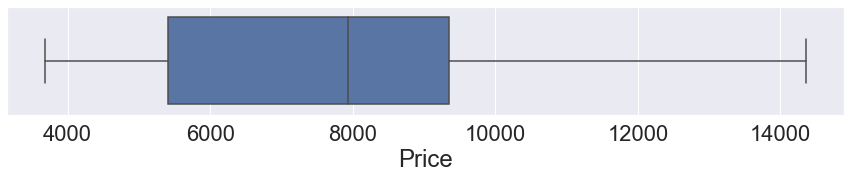

In [690]:
airDataSet = df[df['Airline']=='Vistara']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

VistaraDataSet = airDataSet

4282.0
6451.0
2169.0
1028.5
9704.5


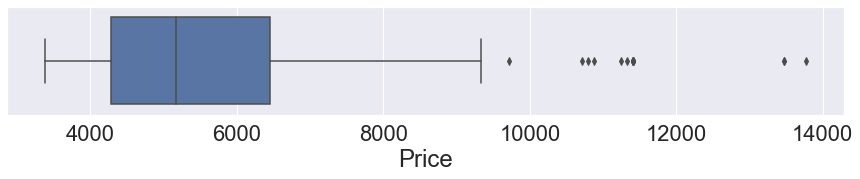

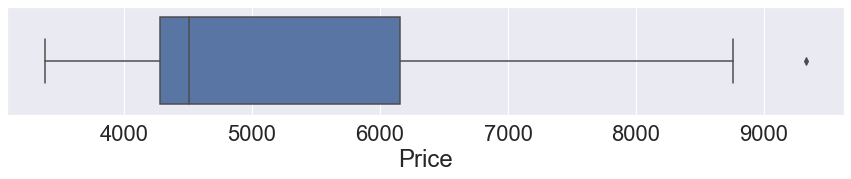

In [691]:
airDataSet = df[df['Airline']=='Air Asia']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

AirAsiaDataSet = airDataSet

7547.0
10459.0
2912.0
3179.0
14827.0


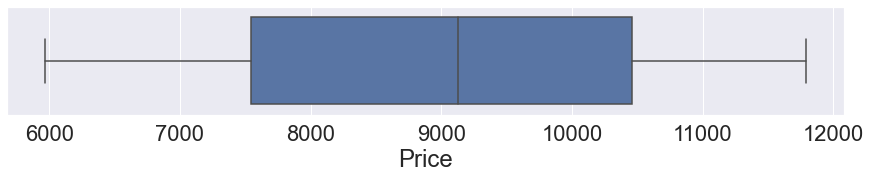

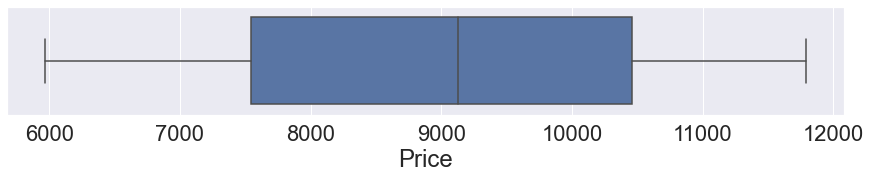

In [692]:
airDataSet = df[df['Airline']=='Vistara Premium economy']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

VistaraPremiumeconomyDataSet = airDataSet

52243.0
61122.5
8879.5
38923.75
74441.75


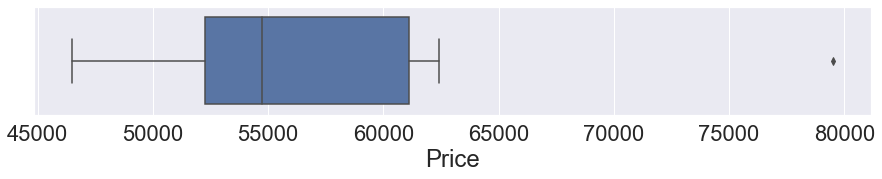

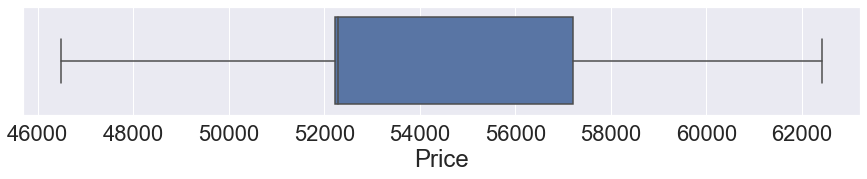

In [693]:
airDataSet = df[df['Airline']=='Jet Airways Business']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.25)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

JetAirwaysBusinessDataSet = airDataSet

9971.4
11269.0
1297.6000000000004
8024.999999999999
13215.400000000001


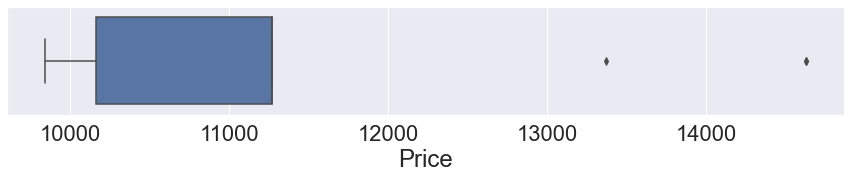

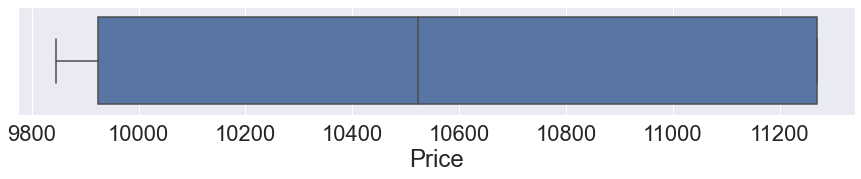

In [694]:
airDataSet = df[df['Airline']=='Multiple carriers Premium economy']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

MultiplecarriersPremiumeconomyDataSet = airDataSet

4140.0
4140.0
0.0
4140.0
4140.0


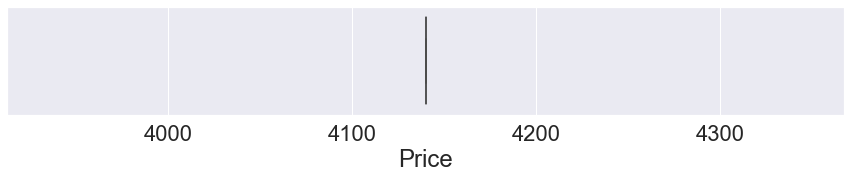

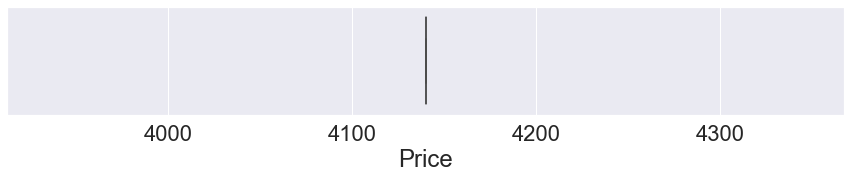

In [695]:
airDataSet = df[df['Airline']=='Trujet']
airDataSet

plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])


q1 = airDataSet['Price'].quantile(0.20)
q3 = airDataSet['Price'].quantile(.75)

IQR = q3-q1

lowerLimit = q1-1.5*IQR 
upperLimit = q3+1.5*IQR

print(q1)
print(q3)
print(IQR)
print(lowerLimit)
print(upperLimit)
airDataSet.drop(airDataSet[airDataSet['Price']>upperLimit].index,axis=0,inplace=True)
airDataSet.drop(airDataSet[airDataSet['Price']<lowerLimit].index,axis=0,inplace=True)

airDataSet
plt.figure(figsize=(15,2))
sns.boxplot(x=airDataSet['Price'])

TrujetDataSet = airDataSet

In [696]:
airlineList = [
IndiGoDataSet,
AirIndiaDataSet,
JetAirwaysDataSet,
SpiceJetDataSet,
MultiplecarriersDataSet,
GoAirDataSet,
VistaraDataSet,
AirAsiaDataSet,
VistaraPremiumeconomyDataSet,
JetAirwaysBusinessDataSet,
MultiplecarriersPremiumeconomyDataSet,
TrujetDataSet]

In [697]:
'''dfs = []
for i in airlineList:
    dfs.append(i)
'''
dfs = airlineList

final_df = pd.concat(dfs, axis=0, ignore_index=True)

final_df



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
10347,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
10348,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
10349,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
10350,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


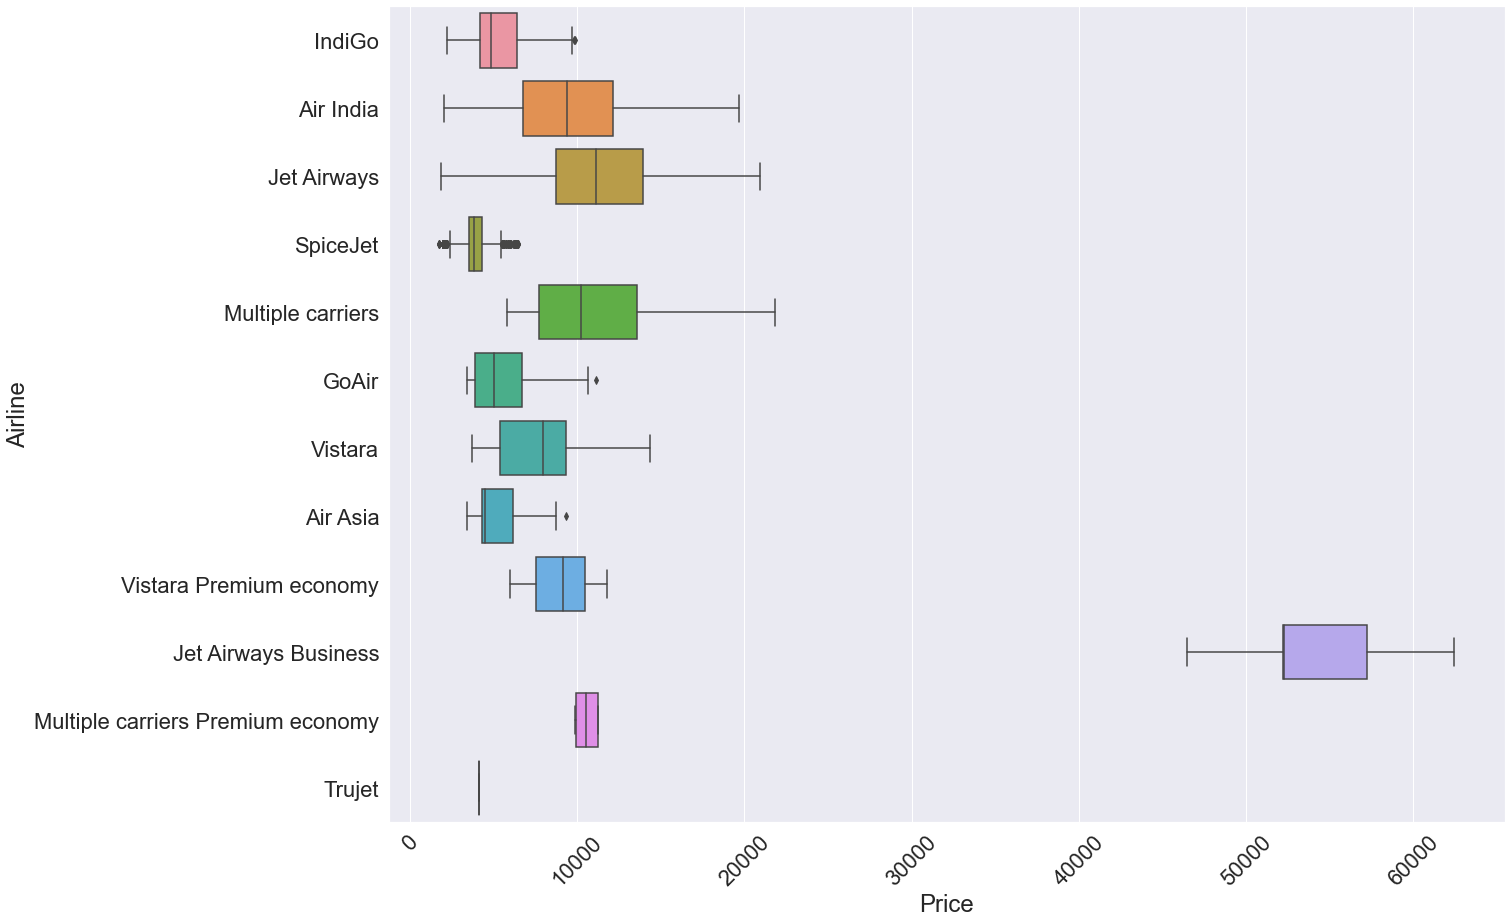

In [698]:
plt.figure(figsize=(20,15))
sns.boxplot(y=final_df['Airline'],x=final_df['Price'])
plt.xticks(rotation=45)
plt.show()


In [699]:
'''plt.figure(figsize=(15,15))

for i in list(enumerate(final_df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = final_df[final_df['Airline']==i[1]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 

'''

"plt.figure(figsize=(15,15))\n\nfor i in list(enumerate(final_df['Airline'].unique())):\n    plt.subplot(3,4,i[0]+1)\n    indi = final_df[final_df['Airline']==i[1]\n    sns.kdeplot(x=indi['Price'])\n    plt.xlabel(i[1]) \n\n"

In [700]:
'''for i in list(enumerate(final_df['Airline'].unique())):
    indi = final_df[final_df['Airline']==i[1]

'''

"for i in list(enumerate(final_df['Airline'].unique())):\n    indi = final_df[final_df['Airline']==i[1]\n\n"

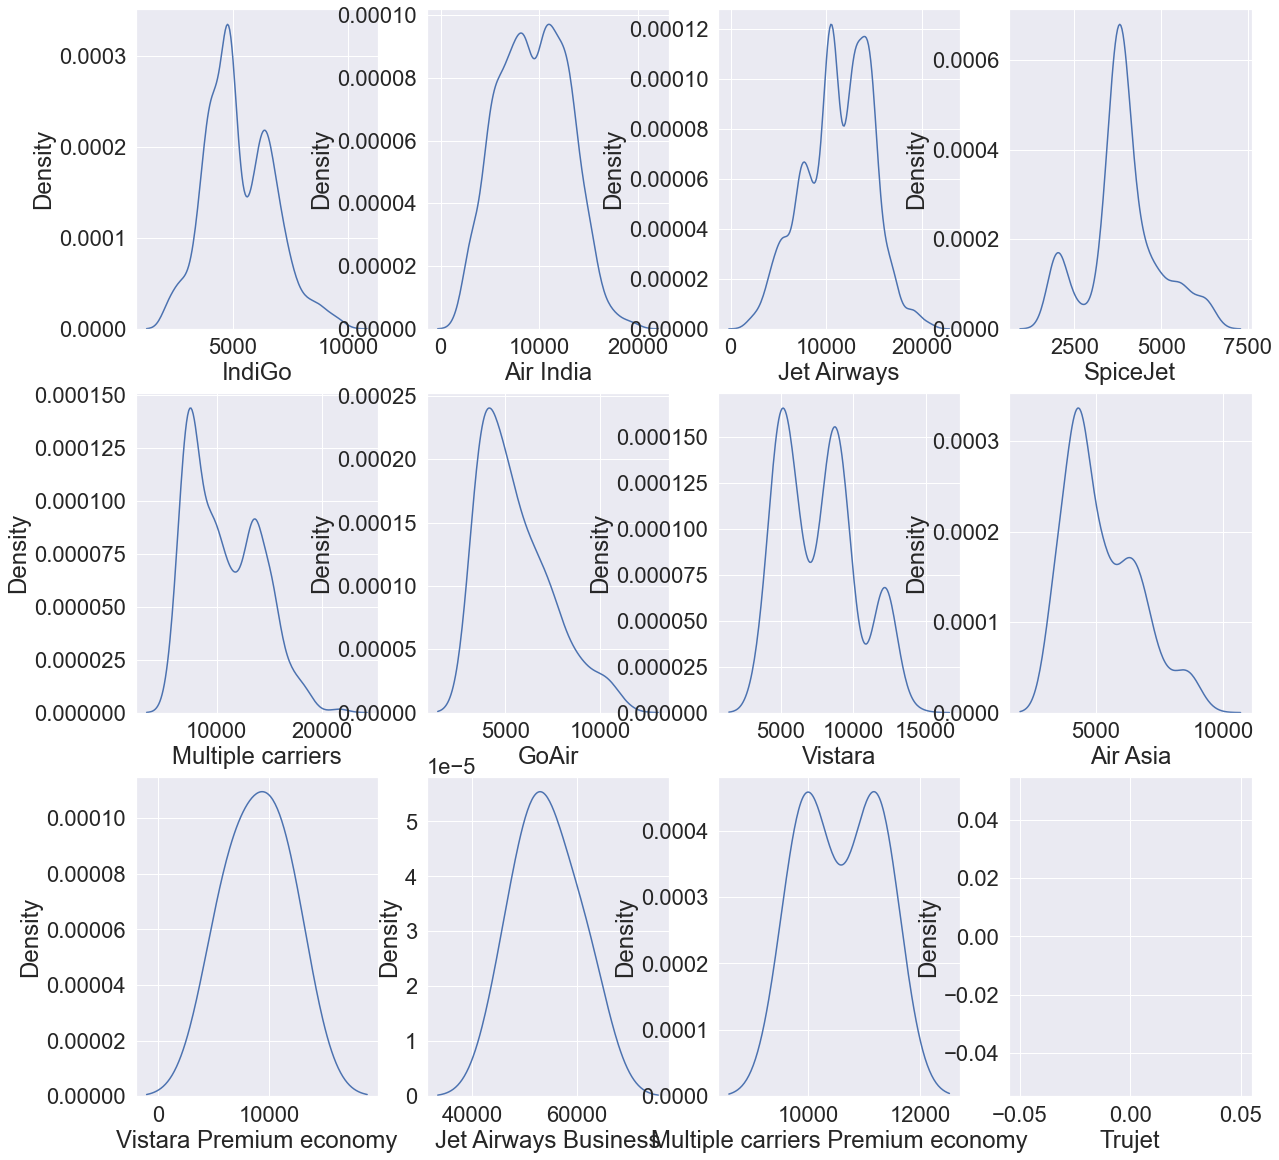

In [701]:
plt.figure(figsize=(20,20))

for i in list(enumerate(final_df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = final_df[final_df['Airline']==final_df['Airline'].unique()[i[0]]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [702]:
df = final_df
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943
...,...,...,...,...,...,...,...,...,...,...,...
10347,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845
10348,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269
10349,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885
10350,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269


In [703]:
df['Additional_Info'].value_counts()

No info                         8032
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                     7
Change airports                    6
No Info                            3
Business class                     2
Name: Additional_Info, dtype: int64

In [704]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.year
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019


In [705]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

df['Dept_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4,0,6,50


In [706]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [707]:
df['Duration'].unique()

array(['2h 50m', '5h 25m', '2h 35m', '2h 55m', '5h 45m', '10h 25m', '3h',
       '10h 30m', '2h 15m', '5h', '1h 30m', '9h 35m', '2h 25m', '2h 20m',
       '2h 45m', '8h 35m', '4h 50m', '9h 20m', '5h 5m', '4h 55m',
       '6h 20m', '3h 15m', '11h 15m', '14h 5m', '1h 25m', '2h 40m',
       '14h 40m', '8h', '4h 20m', '5h 20m', '7h 5m', '5h 15m', '9h 30m',
       '4h 25m', '13h 55m', '16h 25m', '4h 40m', '4h 35m', '7h 35m',
       '3h 55m', '5h 10m', '4h 45m', '13h 30m', '4h', '7h 15m', '14h 55m',
       '16h 15m', '8h 10m', '6h 55m', '7h', '11h 45m', '10h 35m',
       '1h 35m', '4h 30m', '2h 30m', '8h 45m', '15h 40m', '14h 20m',
       '12h 30m', '6h 10m', '8h 25m', '5h 55m', '11h 5m', '14h 50m',
       '12h 35m', '3h 5m', '14h 45m', '5h 35m', '16h 5m', '13h', '4h 15m',
       '3h 40m', '10h 45m', '8h 50m', '12h 45m', '8h 20m', '5h 40m',
       '11h 50m', '13h 45m', '5h 50m', '5h 30m', '4h 10m', '10h 15m',
       '4h 5m', '6h 15m', '9h 25m', '12h 10m', '8h 5m', '7h 25m',
       '13h 15m',

In [708]:

print(df.loc[0,'Duration'].split(" "))


['2h', '50m']


In [709]:
df["hoursMinutes"] = 0
for i in range(len(df['Duration'])):
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,325
2,IndiGo,18/04/2019,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,non-stop,No info,4174,18,4,2019,20,20,22,55,155
3,IndiGo,24/04/2019,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,non-stop,No info,4804,24,4,2019,17,15,19,50,155
4,IndiGo,3/04/2019,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,non-stop,No info,3943,3,4,2019,4,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,21:00,12h 5m,1 stop,No info,9845,21,3,2019,8,55,21,0,725
10348,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,08:55,15:30,6h 35m,1 stop,No info,11269,21,3,2019,8,55,15,30,395
10349,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 22 Mar,6h 35m,1 stop,No info,10885,21,3,2019,19,0,1,35,395
10350,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,DEL → BOM → COK,07:30,15:30,8h,1 stop,No info,11269,21,3,2019,7,30,15,30,480


In [710]:
df = df.drop(["Arrival_Time","Arrival_Time","Dep_Time","Date_of_Journey","Route","Duration","Additional_Info"], axis = 1)
df.head(2)



,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,3897,24,3,2019,22,20,1,10,170
1,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,325


In [711]:
df['Total_Stops'].unique()

array(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [712]:
df.columns
data_train = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

data_train

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes,Price
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,22,20,1,10,170,3897
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,18,5,23,30,325,6218
2,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155,4174
3,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,17,15,19,50,155,4804
4,IndiGo,Banglore,Delhi,non-stop,3,4,2019,4,0,6,50,170,3943
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10347,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,21,0,725,9845
10348,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,15,30,395,11269
10349,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,19,0,1,35,395,10885
10350,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,7,30,15,30,480,11269


In [713]:
# target Feature
y = data_train['Price']
y.head()



0    3897
1    6218
2    4174
3    4804
4    3943
Name: Price, dtype: int64

In [714]:
# independat Feature
X = data_train.drop(['Price'],axis=1)
X


,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
0,IndiGo,Banglore,Delhi,non-stop,24,3,2019,22,20,1,10,170
1,IndiGo,Kolkata,Banglore,1 stop,12,5,2019,18,5,23,30,325
2,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,20,20,22,55,155
3,IndiGo,Kolkata,Banglore,non-stop,24,4,2019,17,15,19,50,155
4,IndiGo,Banglore,Delhi,non-stop,3,4,2019,4,0,6,50,170
...,...,...,...,...,...,...,...,...,...,...,...,...
10347,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,21,0,725
10348,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,8,55,15,30,395
10349,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,19,0,1,35,395
10350,Multiple carriers Premium economy,Delhi,Cochin,1 stop,21,3,2019,7,30,15,30,480


In [715]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train



,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
7782,SpiceJet,Kolkata,Banglore,non-stop,18,6,2019,6,55,9,30,155
6107,Jet Airways,Delhi,Cochin,1 stop,1,6,2019,15,0,19,0,1680
9248,Multiple carriers,Delhi,Cochin,1 stop,15,5,2019,9,45,16,10,385
7598,SpiceJet,Kolkata,Banglore,non-stop,18,3,2019,22,20,0,40,140
9510,GoAir,Delhi,Cochin,1 stop,21,5,2019,7,25,13,20,355
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Jet Airways,Delhi,Cochin,2 stops,9,4,2019,9,25,4,25,1140
5191,Jet Airways,Banglore,Delhi,non-stop,9,4,2019,7,10,10,10,180
5390,Jet Airways,Banglore,Delhi,1 stop,12,3,2019,18,55,19,10,1455
860,IndiGo,Kolkata,Banglore,non-stop,18,4,2019,21,25,0,5,160


In [716]:
X_test

,Airline,Source,Destination,Total_Stops,Day,Month,Year,Dept_Hour,Dept_Minute,Arr_Hour,Arr_Minute,hoursMinutes
543,IndiGo,Mumbai,Hyderabad,non-stop,21,5,2019,20,5,21,40,95
4868,Jet Airways,Banglore,Delhi,non-stop,1,6,2019,15,15,18,10,175
9533,GoAir,Delhi,Cochin,1 stop,9,6,2019,14,25,19,35,310
5992,Jet Airways,Delhi,Cochin,1 stop,9,5,2019,19,45,4,25,520
4049,Jet Airways,Mumbai,Hyderabad,non-stop,15,6,2019,19,35,21,5,90
...,...,...,...,...,...,...,...,...,...,...,...,...
9843,Vistara,Banglore,Delhi,non-stop,15,4,2019,21,0,23,50,170
3859,Jet Airways,Delhi,Cochin,1 stop,24,6,2019,20,55,12,35,940
4205,Jet Airways,Delhi,Cochin,1 stop,21,5,2019,8,0,19,0,660
766,IndiGo,Delhi,Cochin,1 stop,15,6,2019,10,35,1,30,895


In [717]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def methodPreprocessing():
    trf1 = ColumnTransformer([
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,2])],remainder='passthrough')
    trf2 = ColumnTransformer([
        ('Ordinal',OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]),[19])]
         ,remainder='passthrough')

    trf3 = ColumnTransformer([
            ('scale', MinMaxScaler(), slice(0, 28))
        ])
    
    pipe = make_pipeline(trf1,trf2,trf3)
    return pipe


pipe = methodPreprocessing()


X_train = pipe.fit_transform(X_train)
pd.DataFrame(X_train)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.653846,1.000000,0.0,0.260870,1.000000,0.391304,0.545455,0.028725
1,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1.000000,0.0,0.652174,0.000000,0.826087,0.000000,0.576302
2,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.538462,0.666667,0.0,0.391304,0.818182,0.695652,0.181818,0.111311
3,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.653846,0.000000,0.0,0.956522,0.363636,0.000000,0.727273,0.023339
4,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.769231,0.666667,0.0,0.304348,0.454545,0.565217,0.363636,0.100539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.307692,0.333333,0.0,0.391304,0.454545,0.173913,0.454545,0.382406
8277,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.307692,0.333333,0.0,0.304348,0.181818,0.434783,0.181818,0.037702
8278,0.25,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.423077,0.000000,0.0,0.782609,1.000000,0.826087,0.181818,0.495512
8279,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.653846,0.333333,0.0,0.913043,0.454545,0.000000,0.090909,0.030521


In [718]:
X_test = pipe.transform(X_test)
print()
print(pd.DataFrame(X_test))



        0    1    2    3    4    5    6    7    8    9   ...   18   19  \
0     0.00  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
1     0.00  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.25  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.25  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.00  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2066  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2067  0.25  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2068  0.25  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2069  0.25  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2070  0.00  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

            20        21   22        23        24        25        26  \
0     0.769231  0.666667  0.0  0.8695

In [721]:
from sklearn.ensemble import RandomForestRegressor

modelRamdom = RandomForestRegressor()
modelRamdom.fit(X_train,y_train)


RandomForestRegressor()

In [722]:
X_train.shape

(8281, 28)

In [723]:
y_pred = modelRamdom.predict(X_test)
y_pred

array([ 2227.        ,  7035.46216667,  8815.77      , ...,
       15560.21483333,  5890.94      ,  4889.82      ])

Text(0, 0.5, 'Test Predicted Data')

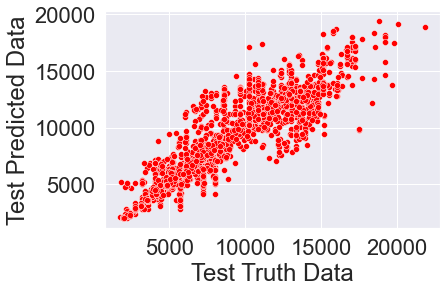

In [724]:

scatter_color = 'red'
sns.scatterplot(y_test,y_pred,color=scatter_color)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")


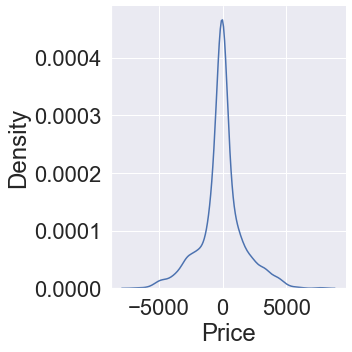

In [725]:
residuals = y_test-y_pred
sns.displot(residuals,kind="kde")

<AxesSubplot:ylabel='Price'>

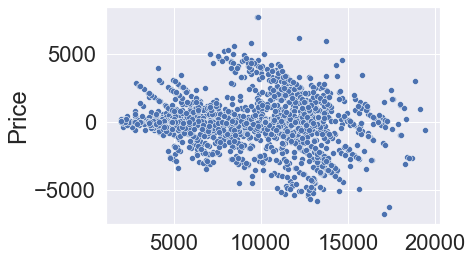

In [726]:
sns.scatterplot(y_pred,residuals)

In [727]:
'''Preformance Metrix'''
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE: 2880701.038328767
MAE: 1113.216112449772
RMSE: 1697.2628076785184


In [728]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score
r2 = metrics.r2_score(y_test,y_pred)
score = r2
## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('r2  : ',r2)

print('aR2 : ', aR2)

r2  :  0.8173667926018104
aR2 :  0.8148625174758803




Lasso()



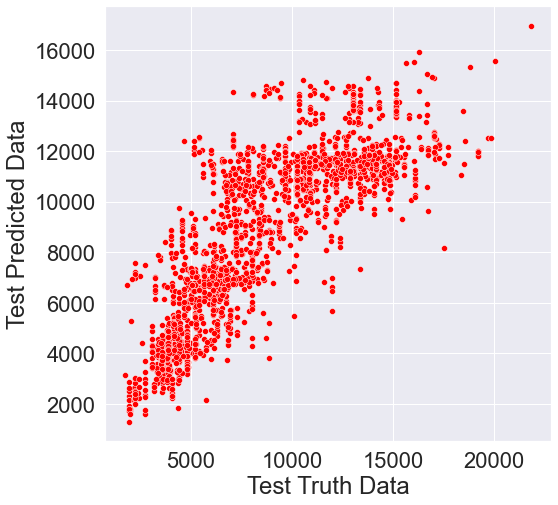

<Figure size 576x576 with 0 Axes>

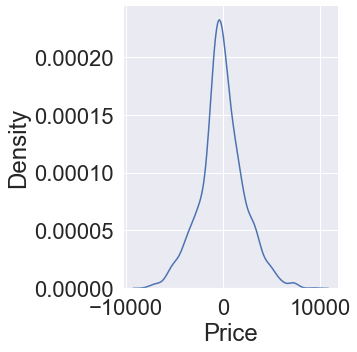

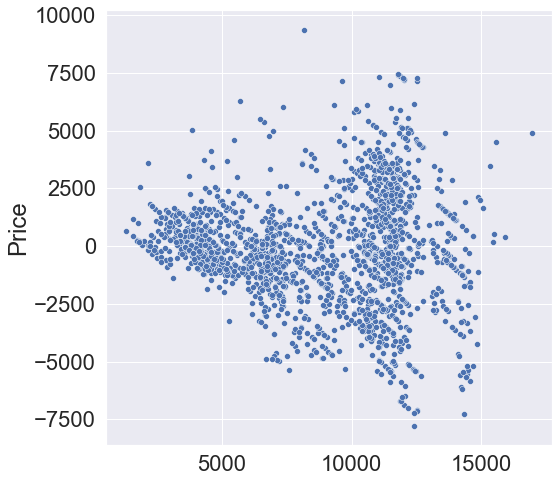

MSE: 5258034.402359921
MAE: 1713.6449119043589
RMSE: 2293.040427545908
r2  :  0.6666465298772808
aR2 :  0.8148625174758803


Ridge()



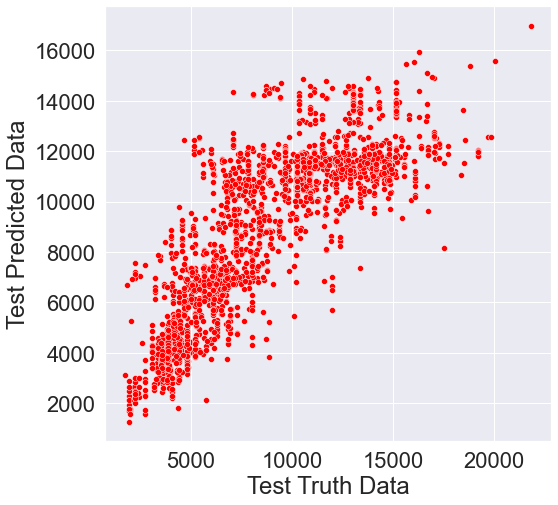

<Figure size 576x576 with 0 Axes>

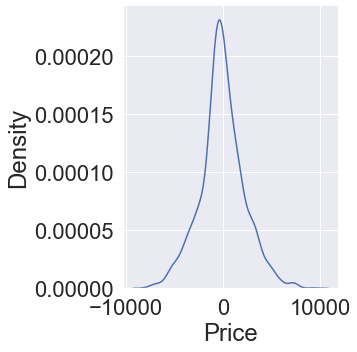

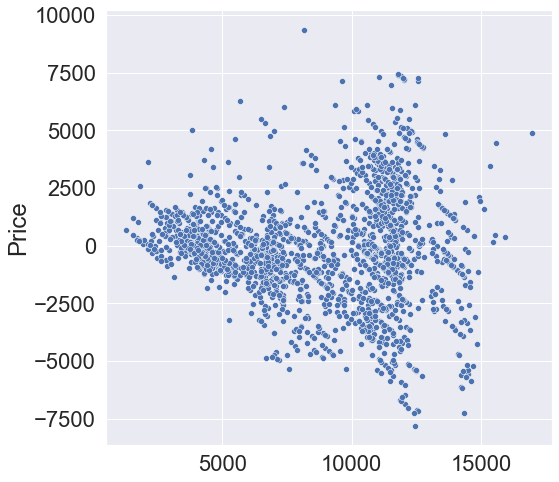

MSE: 5255589.598050934
MAE: 1713.7080308442637
RMSE: 2292.507273282014
r2  :  0.6668015277220658
aR2 :  0.8148625174758803


RandomForestRegressor()



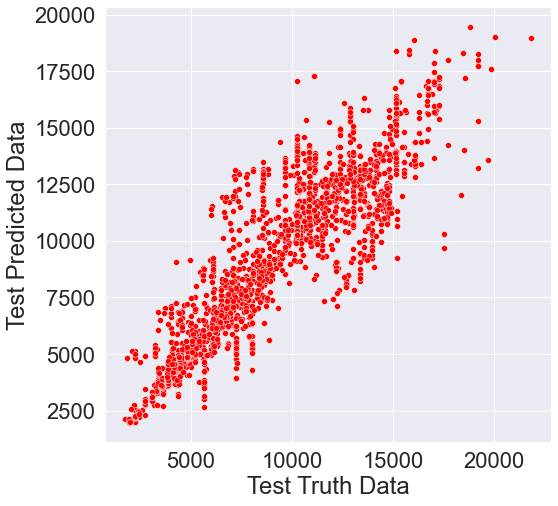

<Figure size 576x576 with 0 Axes>

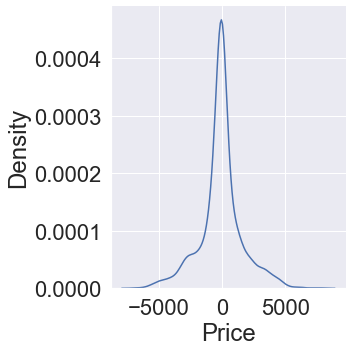

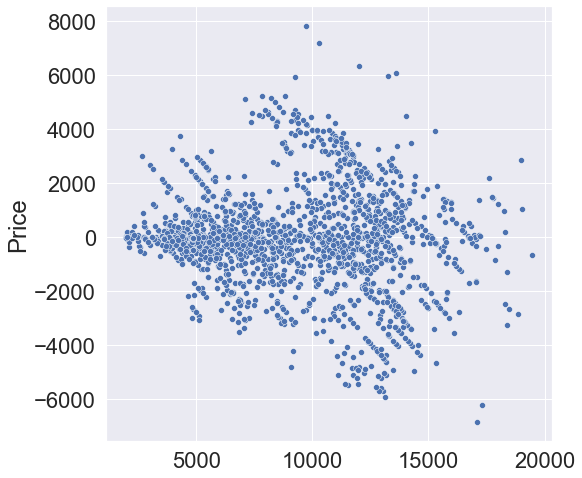

MSE: 2885893.851497435
MAE: 1109.6714483489443
RMSE: 1698.7918799833708
r2  :  0.8170375740845832
aR2 :  0.8148625174758803


LinearRegression()



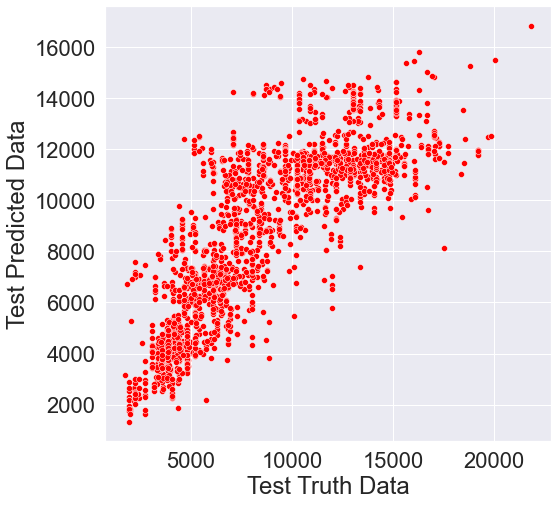

<Figure size 576x576 with 0 Axes>

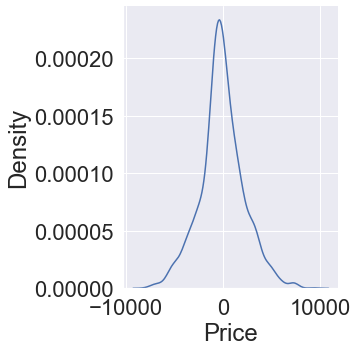

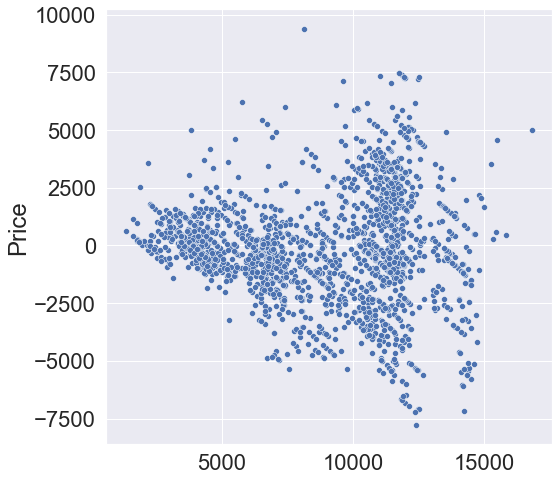

MSE: 5247552.937228392
MAE: 1710.7827136648962
RMSE: 2290.7537923636387
r2  :  0.6673110429835467
aR2 :  0.8148625174758803
{'VALUES': ['MSE', 'MAE', 'RMSE', 'r2', 'aR2'], 'lasso': [5258034.402359921, 1713.6449119043589, 2293.040427545908, 0.6666465298772808, 0.8148625174758803], 'ridge': [5255589.598050934, 1713.7080308442637, 2292.507273282014, 0.6668015277220658, 0.8148625174758803], 'random': [2885893.851497435, 1109.6714483489443, 1698.7918799833708, 0.8170375740845832, 0.8148625174758803], 'linear': [5247552.937228392, 1710.7827136648962, 2290.7537923636387, 0.6673110429835467, 0.8148625174758803]}


In [729]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


modelDict = {'lasso': Lasso(),
            'ridge' : Ridge(),
             'random':RandomForestRegressor(),
             'linear':LinearRegression()
            }

modelDictWithDetails = {'VALUES':['MSE','MAE','RMSE','r2','aR2'],
                        'lasso': [],
                        'ridge' : [],
                        'random':[],
                        'linear':[]}

k=1
for key, value in modelDict.items():

    model=value
    print()
    print()
    print(model)
    print()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred
    
    plt.figure(figsize=(8,8))
    scatter_color = 'red'
    sns.scatterplot(y_test,y_pred,color=scatter_color)
    plt.xlabel("Test Truth Data")
    plt.ylabel("Test Predicted Data")
    plt.show()
    print()
    print()
    residuals = y_test-y_pred
    plt.figure(figsize=(8,8))
    sns.displot(residuals,kind="kde")
    plt.show()
    print()
    plt.figure(figsize=(8,8))
    sns.scatterplot(y_pred,residuals)
    plt.show()

    
    '''Preformance Metrix'''
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
    print('MSE:',MSE)
    print('MAE:',MAE)
    print('RMSE:',RMSE)
    


    ## R Square and Adjusted R Square
    from sklearn.metrics import r2_score
    r2 = metrics.r2_score(y_test,y_pred)

    ## Adjusted R square
    #display adjusted R-squared

    aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    modelDictWithDetails[key].append(MSE)
    modelDictWithDetails[key].append(MAE)
    modelDictWithDetails[key].append(RMSE)
    modelDictWithDetails[key].append(r2)
    modelDictWithDetails[key].append(aR2)

    
    print('r2  : ',r2)
    print('aR2 : ', aR2)
    r2 = 0
    aR2 = 0

    
print(modelDictWithDetails)



In [730]:
models_value=pd.DataFrame(modelDictWithDetails)
models_value

,VALUES,lasso,ridge,random,linear
0,MSE,5.258034e+06,5.255590e+06,2.885894e+06,5.247553e+06
1,MAE,1.713645e+03,1.713708e+03,1.109671e+03,1.710783e+03
2,RMSE,2.293040e+03,2.292507e+03,1.698792e+03,2.290754e+03
3,r2,6.666465e-01,6.668015e-01,8.170376e-01,6.673110e-01
4,aR2,8.148625e-01,8.148625e-01,8.148625e-01,8.148625e-01


In [731]:
import pickle
file = open('flight_rf1.pk2','wb')
pickle.dump(modelRamdom,file)

In [732]:
model = open('flight_rf1.pk2','rb')
modelRamdomModel = pickle.load(model)

In [733]:
modelRamdomModel.predict(X_test[20].reshape(1,-1))

array([10575.7975])